### grp

# Course: _Intermediate R_:
1.  conditionals and control flow
2.  loops
3.  functions
4.  the apply family
5.  utilities

## _1. Conditionals & Control Flow_:
-  relational operators => ==, !=, <, >, <=, >=
-  logical operators => & aka "AND" ... | aka "OR" ... ! aka "NOT"
-  **&& and || only apply logical operator in 1st element in vector/matrix**
-  if statements
-  else statements
-  else if statements

#### equality

In [1]:
TRUE == FALSE
-6 * 14 != 17 - 101
"useR" == "user"
TRUE == 1 # TRUE is equal to 1 under the hood

[1] FALSE

[1] FALSE

[1] FALSE

[1] TRUE

#### greater and less than

In [2]:
-6 * 5 + 2 >= -10 + 1
"raining" <= "raining dogs" # string comparisons are based on alpha order
TRUE > FALSE

[1] FALSE

[1] TRUE

[1] TRUE

#### vector comparison

In [3]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
facebook <- c(17, 7, 5, 16, 8, 13, 14)

linkedin >= 15
linkedin <= 5
linkedin > facebook

[1]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE

[1] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE

[1] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE

#### matrix comparison

In [4]:
views <- matrix(c(linkedin, facebook), nrow = 2, byrow = TRUE)

views
views == 13
views <= 14

16,9,13,5,2,17,14
17,7,5,16,8,13,14


FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE


FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


#### & and |

In [5]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
last <- tail(linkedin, 1)

last < 5 | last > 10
last > 15 & last <= 20

[1] TRUE

[1] FALSE

In [6]:
linkedin > 10 & facebook < 10
linkedin >= 12 | facebook >= 12
views > 11 & views <= 14

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE

FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE


#### !

In [7]:
x <- 5
y <- 7
!(!(x < 4) & !!!(y > 12))

[1] FALSE

#### combine operator methods together

In [8]:
hp <- mtcars$hp
outliers <- hp > 100 | hp < 10
sum(outliers)

sum(mtcars$hp > 100 | mtcars$hp < 10) # one liner

[1] 23

[1] 23

#### if statement

In [9]:
medium <- "LinkedIn"
num_views <- 14

if (medium == "LinkedIn") {
  print("Showing LinkedIn information")
}

if (num_views > 15) {
  print("You're popular!")
}

[1] "Showing LinkedIn information"


#### else statement

In [10]:
medium <- "LinkedIn"
num_views <- 14

if (medium == "LinkedIn") {
  print("Showing LinkedIn information")
} else {
  print("Unknown medium")
}

if (num_views > 15) {
  print("You're popular!")
} else {
  print("Try to be more visible!")
}

[1] "Showing LinkedIn information"
[1] "Try to be more visible!"


#### else if statement

In [11]:
medium <- "LinkedIn"
num_views <- 14

if (medium == "LinkedIn") {
  print("Showing LinkedIn information")
} else if (medium == "Facebook") {
  print("Showing Facebook information")
} else {
  print("Unknown medium")
}

if (num_views > 15) {
  print("You're popular!")
} else if (num_views <= 15 & num_views > 10) {
  print("Your number of views is average")
} else {
  print("Try to be more visible!")
}

[1] "Showing LinkedIn information"
[1] "Your number of views is average"


#### combine if/else/else if methods together

In [12]:
li <- 15
fb <- 9

if (li >= 15 & fb >= 15) {
  sms <- 2 * (li + fb)
} else if (li < 10 & fb < 10) {
  sms <- 0.5 * (li + fb)
} else {
  sms <- li + fb
}

sms

[1] 24

## _2. Loops_:
-  while loop:
    -  break statement => control statement that abandons while loop completely
-  for loop:
    -  can iterate over vectors, lists, matrices, and dataframes
    -  break statement => control statement that abandons for loop completely
    -  next statement => control statement that _skips_ to next iteration
    -  index looping => iterate over index position [**see example code exercise**]
    -  nested for loop => [**see example code exercise**]
-  functions:
    -  paste()
    -  strsplit()

#### while loop

In [13]:
speed <- 64

while (speed > 30) {
  print("Slow down!")
  speed <- speed - 7 # FALSE condition to eventually cause WHILE LOOP to stop
}

speed

[1] "Slow down!"
[1] "Slow down!"
[1] "Slow down!"
[1] "Slow down!"
[1] "Slow down!"


[1] 29

In [14]:
speed <- 64

while (speed > 30) {
  print(paste("Your speed is",speed))
  if (speed > 48) {
    print("Slow down big time!")
    speed <- speed - 11
  } else {
    print("Slow down!")
    speed <- speed - 6
  }
}

speed

[1] "Your speed is 64"
[1] "Slow down big time!"
[1] "Your speed is 53"
[1] "Slow down big time!"
[1] "Your speed is 42"
[1] "Slow down!"
[1] "Your speed is 36"
[1] "Slow down!"


[1] 30

In [15]:
i <- 1

while (i <= 10) {
  print(3 * i)
  if ( (3 * i) %% 8 == 0) {
    break
  }
  i <- i + 1
}

i

[1] 3
[1] 6
[1] 9
[1] 12
[1] 15
[1] 18
[1] 21
[1] 24


[1] 8

#### while loop break statement

In [16]:
speed <- 88

while (speed > 30) {
  print(paste("Your speed is", speed))
  
  # Break the while loop when speed exceeds 80
  if (speed > 80) {
  break 
  }
  
  if (speed > 48) {
    print("Slow down big time!")
    speed <- speed - 11
  } else {
    print("Slow down!")
    speed <- speed - 6
  }
}

speed

[1] "Your speed is 88"


[1] 88

#### for loop over vector:
-  version 1 => loop over element
-  version 2 => loop over index

In [17]:
# V1
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
for (i in linkedin) {
  print(i)
}

writeLines("====")

# V2
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
for (i in 1:length(linkedin)) {
  print(linkedin[i])
}

[1] 16
[1] 9
[1] 13
[1] 5
[1] 2
[1] 17
[1] 14
====
[1] 16
[1] 9
[1] 13
[1] 5
[1] 2
[1] 17
[1] 14


#### for loop over list:
-  version 1 => loop over element
-  version 2 => loop over index

In [18]:
# V1
nyc <- list(pop = 8405837, 
            boroughs = c("Manhattan", "Bronx", "Brooklyn", "Queens"), 
            capital = FALSE)

for (i in nyc) {
  print(i)
}

writeLines("====")

# V2
for (i in 1:length(nyc)) {
  print(nyc[[i]])
}

[1] 8405837
[1] "Manhattan" "Bronx"     "Brooklyn"  "Queens"   
[1] FALSE
====
[1] 8405837
[1] "Manhattan" "Bronx"     "Brooklyn"  "Queens"   
[1] FALSE


#### for loop over matrix [nested for loop]

In [19]:
v <- c("O", "NA", "X", "NA", "O", "O", "X", "NA", "X")
ttt <- matrix(v, byrow=TRUE, nrow=3)
ttt

for (i in 1:nrow(ttt)) {
  for (j in 1:ncol(ttt)) {
    print(paste("On row", i, "and column", j, "the board contains", ttt[i,j]))
  }
}

# example ttt positions
ttt[1, 1]
ttt[2, 2]
ttt[3, 3]

O,NA,X
NA,O,O
X,NA,X


[1] "On row 1 and column 1 the board contains O"
[1] "On row 1 and column 2 the board contains NA"
[1] "On row 1 and column 3 the board contains X"
[1] "On row 2 and column 1 the board contains NA"
[1] "On row 2 and column 2 the board contains O"
[1] "On row 2 and column 3 the board contains O"
[1] "On row 3 and column 1 the board contains X"
[1] "On row 3 and column 2 the board contains NA"
[1] "On row 3 and column 3 the board contains X"


[1] "O"

[1] "O"

[1] "X"

#### for loop + control flow statements

In [20]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)

for (li in linkedin) {
  if (li > 10) {
    print("You're popular!")
  } else {
    print("Be more visible!")
  }
  print(li)
}

[1] "You're popular!"
[1] 16
[1] "Be more visible!"
[1] 9
[1] "You're popular!"
[1] 13
[1] "Be more visible!"
[1] 5
[1] "Be more visible!"
[1] 2
[1] "You're popular!"
[1] 17
[1] "You're popular!"
[1] 14


#### for loop break / next statements

In [21]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)

for (li in linkedin) {
  if (li > 10) {
    print("You're popular!")
  } else {
    print("Be more visible!")
  }  
  if (li > 16) {
    print("This is ridiculous, I'm outta here!")
    break
  }  
  if (li < 5) {
    print("This is too embarrassing!")
    next
  }
  print(li)
}

[1] "You're popular!"
[1] 16
[1] "Be more visible!"
[1] 9
[1] "You're popular!"
[1] 13
[1] "Be more visible!"
[1] 5
[1] "Be more visible!"
[1] "This is too embarrassing!"
[1] "You're popular!"
[1] "This is ridiculous, I'm outta here!"


#### for loop w/ text search

In [22]:
rquote <- "r's internals are irrefutably intriguing"
chars <- strsplit(rquote, split = "")[[1]]
chars
rcount <- 0 # initialize count

for (char in chars) {
  if (char == "r") {
    rcount <- rcount + 1
  }
  if (char == "u") {
    break # stop loop when "u" appears
  }
}

rcount

[1] "r" "'" "s" " " "i" "n" "t" "e" "r" "n" "a" "l" "s" " " "a" "r" "e" " " "i"
[20] "r" "r" "e" "f" "u" "t" "a" "b" "l" "y" " " "i" "n" "t" "r" "i" "g" "u" "i"
[39] "n" "g"

[1] 5

## _3. Functions_:
-  documentation:
    -  help(function) ... ex: help(sd) or ?sd
    -  args(function) ... ex: args(sd) ***prints arguments in function***
-  ***R functions matches input values to function's arguments by element position or name***
-  arguments:
    -  some functions have default values
    -  ... "ellipsis" => way for R to pass additional arguments along w/o the function having to name them explicitly
    -  ***args that have "=" ... ex: header = FALSE are optional args ... args w/o "=" ... ex: x are required***
    -  ***R cannot dynamically change the variable that is input to that function***
-  functions:
    -  mean()
    -  sd()
    -  paste()
    -  abs()
    -  udfs => functions with custom arguments and logic
    -  search() => view loaded packages
-  scoping => ***variables defined inside a function are not accessible outside that function***
-  packages => bundles of code, data, documentation, and tests stored in CRAN [**Comprehensive R Archive Network**]:
    -  install packages - install.packages()
    -  load packages - library(), require()
    -  load package - attach package to search list

#### search documentation

In [23]:
# help(mean)
# ?mean

#### search function arguments

In [24]:
args(mean)

function (x, ...) 
NULL

#### apply function

In [25]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
facebook <- c(17, 7, 5, 16, 8, 13, 14)

avg_li <- mean(x = linkedin) # assign argument to value
avg_fb <- mean(facebook) # function automatically assigns argument to position value

avg_li
avg_fb

[1] 10.85714

[1] 11.42857

In [26]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
facebook <- c(17, 7, 5, 16, 8, 13, 14)

avg_sum <- mean(linkedin) + mean(facebook)
avg_sum_trimmed <- mean(x = linkedin + facebook, trim = 0.2)

avg_sum
avg_sum_trimmed

[1] 22.28571

[1] 22.6

#### manipulating function arguments

In [27]:
linkedin <- c(16, 9, 13, 5, NA, 17, 14)
facebook <- c(17, NA, 5, 16, 8, 13, 14)

mean(linkedin)
mean(linkedin, na.rm = TRUE)

[1] NA

[1] 12.33333

#### paste function

In [28]:
speed <- 31
print(paste("Your speed is", speed))

[1] "Your speed is 31"


#### nested function

In [29]:
linkedin <- c(16, 9, 13, 5, NA, 17, 14)
facebook <- c(17, NA, 5, 16, 8, 13, 14)

mean(abs(linkedin - facebook), na.rm = TRUE) 
# na.rim => a logical value indicating whether NA values should be stripped before the computation proceeds

[1] 4.8

#### user defined functions

In [30]:
pow_two <- function(x) {
  x ^ 2
}
pow_two(12)

sum_abs <- function(x, y) {
  abs(x) + abs(y)
}
sum_abs(-2, 3)

[1] 144

[1] 5

#### user defined function w/ no arguments

In [31]:
hello <- function() {
  print("Hi there!")
  return(TRUE)
}

hello()

[1] "Hi there!"


[1] TRUE

#### user defined function w/ default value

In [32]:
pow_two <- function(x, print_info = TRUE) {
  y <- x ^ 2
  if (print_info) {
    print(paste(x, "to the power two equals", y))
  }
  return(y)
}

pow_two(5)
writeLines("====")
pow_two(5, FALSE)
writeLines("====")
pow_two(5, TRUE)

[1] "5 to the power two equals 25"


[1] 25

====


[1] 25

====
[1] "5 to the power two equals 25"


[1] 25

#### user defined function w/ control flow

In [33]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
facebook <- c(17, 7, 5, 16, 8, 13, 14)

interpret <- function(num_views) {
  if (num_views > 15) {
    print("You're popular!")
    return(num_views)
  } else {
    print("Try to be more visible!")
    return(0)
  }
}

interpret(linkedin[1])
writeLines("====")
interpret(facebook[2])

[1] "You're popular!"


[1] 16

====
[1] "Try to be more visible!"


[1] 0

#### nested udf

In [34]:
linkedin <- c(16, 9, 13, 5, 2, 17, 14)
facebook <- c(17, 7, 5, 16, 8, 13, 14)

# the interpret() can be used inside interpret_all()
interpret <- function(num_views) {
  if (num_views > 15) {
    print("You're popular!")
    return(num_views)
  } else {
    print("Try to be more visible!")
    return(0)
  }
}

# define the interpret_all() function
# views: vector with data to interpret
# return_sum: return total number of views on popular days?
interpret_all <- function(views, return_sum = TRUE) {
  count <- 0

  for (v in views) {
    count <- count + interpret(v)
  }

  if (return_sum) {
    return(count)
  } else {
    return(NULL)
  }
}

interpret_all(linkedin)
interpret_all(facebook)

[1] "You're popular!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"
[1] "You're popular!"
[1] "Try to be more visible!"


[1] 33

[1] "You're popular!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"
[1] "You're popular!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"
[1] "Try to be more visible!"


[1] 33

#### installed packages

In [35]:
search()

[1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"

#### install package

In [36]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


#### load package

In [37]:
library("ggplot2")

#### visualize package

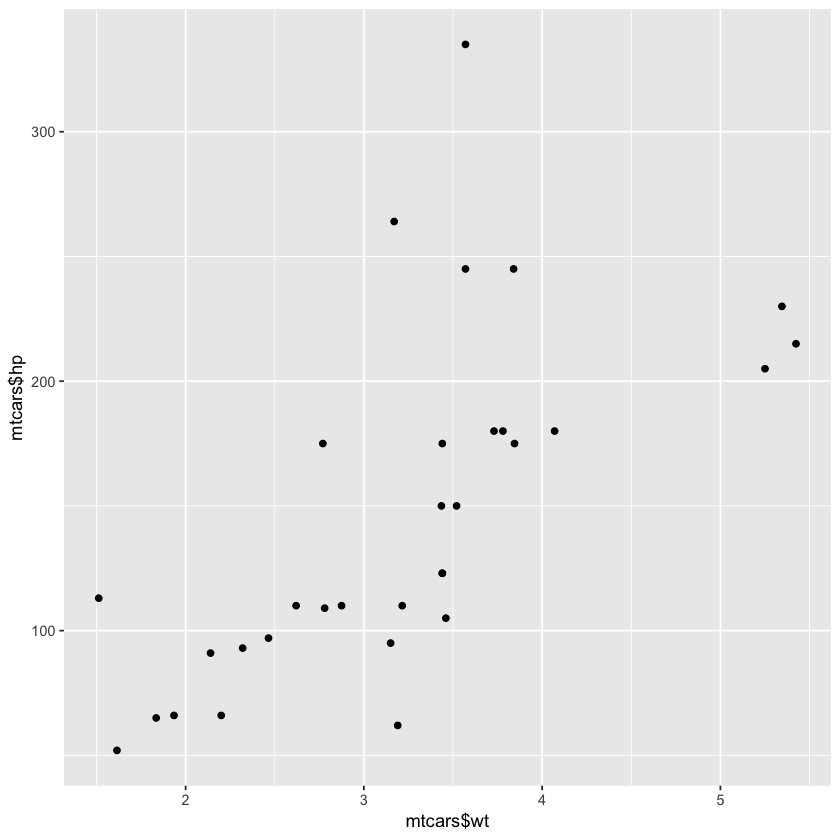

In [38]:
qplot(mtcars$wt, mtcars$hp)

#### confirm attached package

In [39]:
search()

[1] ".GlobalEnv"        "package:ggplot2"   "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

## _4. The Apply Family_:
-  anonymous functions
-  functions:
    -  lapply() => applies function over list or vector and **ALWAYS RETURNS A LIST to store heterogeneous objects**
    -  unlist()
    -  strsplit() => splits string on del
    -  tolower()
    -  identical()
    -  cat() => concatenates string
    -  sapply() => wrapper for lapply() over list or vector and ***returns vector, matrix, or array***
    -  vapply() => pre-specified type of return value output format
-  documentation:
    -  https://www.rdocumentation.org/packages/base/versions/3.5.3/topics/lapply

#### lapply()

In [40]:
pioneers <- c("GAUSS:1777", "BAYES:1702", "PASCAL:1623", "PEARSON:1857")

split_math <- strsplit(pioneers, split = ":")
split_low <- lapply(split_math, tolower)

str(split_low)

List of 4
 $ : chr [1:2] "gauss" "1777"
 $ : chr [1:2] "bayes" "1702"
 $ : chr [1:2] "pascal" "1623"
 $ : chr [1:2] "pearson" "1857"


In [41]:
pioneers <- c("GAUSS:1777", "BAYES:1702", "PASCAL:1623", "PEARSON:1857")
split <- strsplit(pioneers, split = ":")
split_low <- lapply(split, tolower)

select_first <- function(x) {
  x[1]
}

names <- lapply(split_low, select_first)

select_second <- function(x) {
  x[2]
}

years <- lapply(split_low, select_second)

In [42]:
split_low

[[1]]
[1] "gauss" "1777" 

[[2]]
[1] "bayes" "1702" 

[[3]]
[1] "pascal" "1623"  

[[4]]
[1] "pearson" "1857"

In [43]:
unlist(names)

[1] "gauss"   "bayes"   "pascal"  "pearson"

In [44]:
unlist(years)

[1] "1777" "1702" "1623" "1857"

#### anonymous function

In [45]:
split_low

names <- lapply(split_low, function(x) { x[1] })
years <- lapply(split_low, function(x) { x[2] })

names
years

[[1]]
[1] "gauss" "1777" 

[[2]]
[1] "bayes" "1702" 

[[3]]
[1] "pascal" "1623"  

[[4]]
[1] "pearson" "1857"

[[1]]
[1] "gauss"

[[2]]
[1] "bayes"

[[3]]
[1] "pascal"

[[4]]
[1] "pearson"

[[1]]
[1] "1777"

[[2]]
[1] "1702"

[[3]]
[1] "1623"

[[4]]
[1] "1857"

#### lapply() w/ additional args

In [46]:
pioneers <- c("GAUSS:1777", "BAYES:1702", "PASCAL:1623", "PEARSON:1857")
split <- strsplit(pioneers, split = ":")
split_low <- lapply(split, tolower)

select_el <- function(x, index) {
  x[index]
}

names <- lapply(split_low, select_el, index = 1) # arg for index position
years <- lapply(split_low, select_el, index = 2) # arg for index position

names
years

[[1]]
[1] "gauss"

[[2]]
[1] "bayes"

[[3]]
[1] "pascal"

[[4]]
[1] "pearson"

[[1]]
[1] "1777"

[[2]]
[1] "1702"

[[3]]
[1] "1623"

[[4]]
[1] "1857"

#### lapply() that return NULL

In [47]:
lapply(split_low, function(x) {
  if (nchar(x[1]) > 5) {
    return(NULL)
  } else {
    return(x[2])
  }
})

[[1]]
[1] "1777"

[[2]]
[1] "1702"

[[3]]
NULL

[[4]]
NULL

#### sapply()

In [48]:
temp <- list(
    c(3, 7, 9, 6, -1),
    c(6, 9, 12, 13, 5),
    c(4, 8, 3, -1, -3),
    c(1, 4, 7, 2, -2),
    c(5, 7, 9, 4, 2),
    c(-3, 5, 8, 9, 4),
    c(3, 6, 9, 4, 1)
)

lapply(temp, min)
sapply(temp, min)
lapply(temp, max)
sapply(temp, max)

[[1]]
[1] -1

[[2]]
[1] 5

[[3]]
[1] -3

[[4]]
[1] -2

[[5]]
[1] 2

[[6]]
[1] -3

[[7]]
[1] 1

[1] -1  5 -3 -2  2 -3  1

[[1]]
[1] 9

[[2]]
[1] 13

[[3]]
[1] 8

[[4]]
[1] 7

[[5]]
[1] 9

[[6]]
[1] 9

[[7]]
[1] 9

[1]  9 13  8  7  9  9  9

#### sapply() vs lapply()

In [49]:
extremes_avg <- function(x) {
  ( min(x) + max(x) ) / 2
}

sapply(temp, extremes_avg) # returns vector
writeLines("====")
lapply(temp, extremes_avg) # returns list

[1] 4.0 9.0 2.5 2.5 5.5 3.0 5.0

====


[[1]]
[1] 4

[[2]]
[1] 9

[[3]]
[1] 2.5

[[4]]
[1] 2.5

[[5]]
[1] 5.5

[[6]]
[1] 3

[[7]]
[1] 5

In [50]:
extremes <- function(x) {
  c(min = min(x), max = max(x))
}

sapply(temp, extremes) # returns matrix
writeLines("====")
lapply(temp, extremes) # returns list

min,-1,5,-3,-2,2,-3,1
max,9,13,8,7,9,9,9


====


[[1]]
min max 
 -1   9 

[[2]]
min max 
  5  13 

[[3]]
min max 
 -3   8 

[[4]]
min max 
 -2   7 

[[5]]
min max 
  2   9 

[[6]]
min max 
 -3   9 

[[7]]
min max 
  1   9

In [51]:
below_zero <- function(x) {
  return(x[x < 0])
}

freezing_s <- sapply(temp, below_zero)
freezing_l <- lapply(temp, below_zero)

identical(freezing_s, freezing_l) # sapply() cannot simplify to matrix / vector here

freezing_s
freezing_l

[1] TRUE

[[1]]
[1] -1

[[2]]
numeric(0)

[[3]]
[1] -1 -3

[[4]]
[1] -2

[[5]]
numeric(0)

[[6]]
[1] -3

[[7]]
numeric(0)

[[1]]
[1] -1

[[2]]
numeric(0)

[[3]]
[1] -1 -3

[[4]]
[1] -2

[[5]]
numeric(0)

[[6]]
[1] -3

[[7]]
numeric(0)

#### sapply() that return NULL

In [52]:
print_info <- function(x) {
  cat("The average temperature is", mean(x), "\n")
}

sapply(temp, print_info)
writeLines("====")
lapply(temp, print_info)

The average temperature is 4.8 
The average temperature is 9 
The average temperature is 2.2 
The average temperature is 2.4 
The average temperature is 5.4 
The average temperature is 4.6 
The average temperature is 4.6 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

====
The average temperature is 4.8 
The average temperature is 9 
The average temperature is 2.2 
The average temperature is 2.4 
The average temperature is 5.4 
The average temperature is 4.6 
The average temperature is 4.6 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

#### vapply()

In [53]:
temp

basics <- function(x) {
  c(min = min(x), mean = mean(x), max = max(x))
}
vapply(temp, basics, numeric(3)) # returns named vector of length 3 (min, mean, max)

basics <- function(x) {
  c(min = min(x), mean = mean(x), median = median(x), max = max(x))
}
vapply(temp, basics, numeric(4)) # returns named vector of length 4 (min, mean, median, max)

[[1]]
[1]  3  7  9  6 -1

[[2]]
[1]  6  9 12 13  5

[[3]]
[1]  4  8  3 -1 -3

[[4]]
[1]  1  4  7  2 -2

[[5]]
[1] 5 7 9 4 2

[[6]]
[1] -3  5  8  9  4

[[7]]
[1] 3 6 9 4 1

min,-1.0,5,-3.0,-2.0,2.0,-3.0,1.0
mean,4.8,9,2.2,2.4,5.4,4.6,4.6
max,9.0,13,8.0,7.0,9.0,9.0,9.0


min,-1.0,5,-3.0,-2.0,2.0,-3.0,1.0
mean,4.8,9,2.2,2.4,5.4,4.6,4.6
median,6.0,9,3.0,2.0,5.0,5.0,4.0
max,9.0,13,8.0,7.0,9.0,9.0,9.0


#### convert sapply() to vapply()

In [54]:
sapply(temp, max)
sapply(temp, function(x, y) { mean(x) > y }, y = 5)

vapply(temp, max, numeric(1))
vapply(temp, function(x, y) { mean(x) > y }, logical(1), y = 5)

[1]  9 13  8  7  9  9  9

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE

[1]  9 13  8  7  9  9  9

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE

## _5. Utilities_:
-  additional useful functions:
    -  math:
        -  abs() => absolute value
        -  sum() => sum all values
        -  mean() => average
        -  round() => rounds decimal places
    -  data:
        -  seq() => generates sequence w/ args [from, to, by]
        -  rep() => replicates elements of vector/list
        -  sort() => sorts vector in ASC order
        -  str() => R object structure
        -  is.*() => check R object class
        -  as.*() => converts R object from one class to another
        -  unlist() => flatten lists to vector
        -  append() => merge vectors or lists
        -  rev() => reverse elements
    -  regex (help => ?regex):
        -  grep() => character search pattern that returns index location that are TRUE
        -  grepl() => character search pattern that returns boolean [TRUE/FALSE]
        -  sub() => character replacement only only first match in string
        -  gsub() => character replacment on all matches in string
    -  times (**POSIXct**) / dates:
        -  Sys.Date() => date
        -  Sys.time() => time
        -  as.Date() => creates date object w/ date format
        -  diff() => difference between dates

#### math utilities

In [55]:
errors <- c(1.9, -2.6, 4.0, -9.5, -3.4, 7.3)

sum(abs(round(errors)))

[1] 29

In [56]:
vec1 <- c(1.5, 2.5, 8.4, 3.7, 6.3)
vec2 <- rev(vec1)

mean(c(abs(vec1), abs(vec2)))

[1] 4.48

#### data utilities

In [57]:
linkedin <- list(16, 9, 13, 5, 2, 17, 14)
facebook <- list(17, 7, 5, 16, 8, 13, 14)

li_vec <- unlist(linkedin)
fb_vec <- unlist(facebook)

social_vec <- append(li_vec, fb_vec) # merges vectors
sort(social_vec, decreasing = TRUE) # DESC order

[1] 17 17 16 16 14 14 13 13  9  8  7  5  5  2

In [58]:
rep(seq(1, 7, by = 2), times = 7) # 7 replications of sequence

[1] 1 3 5 7 1 3 5 7 1 3 5 7 1 3 5 7 1 3 5 7 1 3 5 7 1 3 5 7

In [59]:
seq1 <- seq(1, 500, by = 3)
seq2 <- seq(1200, 900, by = -7)

sum(seq1) + sum(seq2)

[1] 87029

#### regex utilities

In [60]:
awards <- c("Won 1 Oscar.",
  "Won 1 Oscar. Another 9 wins & 24 nominations.",
  "1 win and 2 nominations.",
  "2 wins & 3 nominations.",
  "Nominated for 2 Golden Globes. 1 more win & 2 nominations.",
  "4 wins & 1 nomination.")

sub(".*\\s([0-9]+)\\snomination.*$", "\\1", awards)

[1] "Won 1 Oscar." "24"           "2"            "3"            "2"           
[6] "1"

**.*: A usual suspect! It can be read as "any character that is matched zero or more times".**

**\\\\s: Match a space. The "s" is normally a character, escaping it (\\\\) makes it a metacharacter.**

**[0-9]+: Match the numbers 0 to 9, at least once (+).**

**([0-9]+): The parentheses are used to make parts of the matching string available to define the replacement.
The \\\\1 in the replacement argument of sub() gets set to the string that is captured by the regular expression [0-9]+.**


In [61]:
emails <- c("john.doe@ivyleague.edu", "education@world.gov", "dalai.lama@peace.org",
            "invalid.edu", "quant@bigdatacollege.edu", "cookie.monster@sesame.tv")

grepl(pattern = "edu", emails)

hits <- grep("edu", emails)
emails[hits]

[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE

[1] "john.doe@ivyleague.edu"   "education@world.gov"     
[3] "invalid.edu"              "quant@bigdatacollege.edu"

**@, because a valid email must contain an at-sign.**

**._*_, which matches any character (.) zero or more times (*). 
Both the dot and the asterisk are metacharacters. 
You can use them to match any character between the at-sign and the ".edu" portion of an email address.**

**\\\\.edu$, to match the ".edu" part of the email at the end of the string.**
**The \\\\ part escapes the dot: it tells R that you want to use the . as an actual character.**

In [62]:
emails <- c("john.doe@ivyleague.edu", "education@world.gov", "dalai.lama@peace.org",
            "invalid.edu", "quant@bigdatacollege.edu", "cookie.monster@sesame.tv")

grepl("@.*\\.edu$", emails)

hits <- grep("@.*\\.edu$", emails)
emails[hits]

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE

[1] "john.doe@ivyleague.edu"   "quant@bigdatacollege.edu"

In [63]:
emails <- c("john.doe@ivyleague.edu", "education@world.gov", "global@peace.org",
            "invalid.edu", "quant@bigdatacollege.edu", "cookie.monster@sesame.tv")

sub("@.*\\.edu$", "@datacamp.edu", emails)

[1] "john.doe@datacamp.edu"    "education@world.gov"     
[3] "global@peace.org"         "invalid.edu"             
[5] "quant@datacamp.edu"       "cookie.monster@sesame.tv"

#### time / date utilities

In [64]:
# the current date: today
today <- Sys.Date()
today

# under the hood
unclass(today)

# the current time: now
now <- Sys.time()
now

# under the hood
unclass(now)

[1] "2019-03-17"

[1] 17972

[1] "2019-03-17 20:01:36 CDT"

[1] 1552870897

#### date format w/ examples:
-  %Y: 4-digit year (1982)
-  %y: 2-digit year (82)
-  %m: 2-digit month (01)
-  %d: 2-digit day of the month (13)
-  %A: weekday (Wednesday)
-  %a: abbreviated weekday (Wed)
-  %B: month (January)
-  %b: abbreviated month (Jan)

In [65]:
as.Date("1982-01-13")
as.Date("Jan-13-82", format = "%b-%d-%y")
as.Date("13 January, 1982", format = "%d %B, %Y")

writeLines("====")

today <- Sys.Date()
format(Sys.Date(), format = "%d %B, %Y")
format(Sys.Date(), format = "Today is a %A!")

[1] "1982-01-13"

[1] "1982-01-13"

[1] "1982-01-13"

====


[1] "17 March, 2019"

[1] "Today is a Sunday!"

In [66]:
str1 <- "May 23, '96"
str2 <- "2012-03-15"
str3 <- "30/January/2006"

# convert the strings to dates: date1, date2, date3
date1 <- as.Date(str1, format = "%b %d, '%y")
date2 <- as.Date(str2)
date3 <- as.Date(str3, format = "%d/%B/%Y")

date1
date2
date3

writeLines("====")

# convert dates to formatted strings
format(date1, "%A")
format(date2, "%d")
format(date3, "%b %Y")

[1] "1996-05-23"

[1] "2012-03-15"

[1] "2006-01-30"

====


[1] "Thursday"

[1] "15"

[1] "Jan 2006"

#### time format w/ examples (help => ?strptime):
-  %H: hours as a decimal number (00-23)
-  %I: hours as a decimal number (01-12)
-  %M: minutes as a decimal number
-  %S: seconds as a decimal number
-  %T: shorthand notation for the typical format %H:%M:%S
-  %p: AM/PM indicator

In [67]:
str1 <- "May 23, '96 hours:23 minutes:01 seconds:45"
str2 <- "2012-3-12 14:23:08"

# convert the strings to POSIXct objects: time1, time2
time1 <- as.POSIXct(str1, format = "%B %d, '%y hours:%H minutes:%M seconds:%S")
time2 <- as.POSIXct(str2)

time1
time2

writeLines("====")

# convert times to formatted strings
format(time1, "%M")
format(time2, "%I:%M %p")

[1] "1996-05-23 23:01:45 CDT"

[1] "2012-03-12 14:23:08 CDT"

====


[1] "01"

[1] "02:23 PM"

#### date calculations

In [68]:
today <- Sys.Date()
today + 1
today - 1

as.Date("2015-03-12") - as.Date("2015-02-27")

[1] "2019-03-18"

[1] "2019-03-16"

Time difference of 13 days

In [69]:
d1 <- as.Date("2019-02-28")
d2 <- as.Date("2019-03-02")
d3 <- as.Date("2019-03-07")
d4 <- as.Date("2019-03-13")
d5 <- as.Date("2019-03-18")

d5 - d1 # diff between last and first pizza day

writeLines("====")

pizza <- c(d1, d2, d3, d4, d5) # pizza vector

day_diff <- diff(pizza) # diff between consecutive pizza days: day_diff
day_diff

writeLines("====")

mean(day_diff) # avg period between two consecutive pizza days

Time difference of 18 days

====


Time differences in days
[1] 2 5 6 5

====


Time difference of 4.5 days

#### time calculations

In [70]:
birth <- as.POSIXct("1879-03-14 14:37:23")
death <- as.POSIXct("1955-04-18 03:47:12")
einstein <- death - birth
einstein

writeLines("====")

now <- Sys.time()
now + 3600
now - 3600 * 24

Time difference of 27792.55 days

====


[1] "2019-03-17 21:01:36 CDT"

[1] "2019-03-16 20:01:36 CDT"

In [71]:
login <- as.POSIXct(c("2019-03-04 10:18:04 UTC",
           "2019-03-09 09:14:18 UTC",
           "2019-03-09 12:21:51 UTC",
           "2019-03-09 12:37:24 UTC",
           "2019-03-11 21:37:55 UTC"))

logout <- as.POSIXct(c("2019-03-04 10:56:29 UTC",
            "2019-03-09 09:14:52 UTC",
            "2019-03-09 12:35:48 UTC",
            "2019-03-09 13:17:22 UTC",
            "2019-03-11 22:08:47 UTC"))

# diff between login and logout: time_online
time_online <- logout - login

time_online

# total time online
sum(time_online)

# avg time online
mean(time_online)

Time differences in secs
[1] 2305   34  837 2398 1852

Time difference of 7426 secs

Time difference of 1485.2 secs

In [72]:
astro <- c("20-Mar-2015",
           "25-Jun-2015",
           "23-Sep-2015",
           "22-Dec-2015")

meteo <- c("March 1, 15",
           "June 1, 15",
           "September 1, 15",
           "December 1, 15")

names(astro) <- c("spring", "summer", "fall", "winter")
names(meteo) <- c("spring", "summer", "fall", "winter")

print(astro)
print(meteo)

# convert astro to vector of Date objects: astro_dates
astro_dates <- as.Date(astro, format = "%d-%b-%Y") 

# convert meteo to vector of Date objects: meteo_dates
meteo_dates <- as.Date(meteo, format = "%B %d, %y")

# calculate max abs diff between astro_dates and meteo_dates
max(abs(meteo_dates - astro_dates))

       spring        summer          fall        winter 
"20-Mar-2015" "25-Jun-2015" "23-Sep-2015" "22-Dec-2015" 
           spring            summer              fall            winter 
    "March 1, 15"      "June 1, 15" "September 1, 15"  "December 1, 15" 


Time difference of 24 days

### grp